In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tensorflow-speech-recognition-challenge/link_to_gcp_credits_form.txt
/kaggle/input/tensorflow-speech-recognition-challenge/test.7z
/kaggle/input/tensorflow-speech-recognition-challenge/sample_submission.7z
/kaggle/input/tensorflow-speech-recognition-challenge/train.7z


In [4]:
!pip install pyunpack
!pip install patool
!pip install py7zr
# pyunpack - unpack archive files in Python
# patool - Various archive formats can be created, extracted, tested, listed, searched, compared and repacked by patool.
# py7xr - py7zr is a library and utility to support 7zip archive compression, decompression, encryption and decryption

In [5]:
from py7zr import unpack_7zarchive
import shutil
# shutil - Shutil module offers high-level operation on a file like a copy, create, and remote operation on the file.
shutil.register_unpack_format('7zip', ['.7z'], unpack_7zarchive)
shutil.unpack_archive('/kaggle/input/tensorflow-speech-recognition-challenge/train.7z', '/kaggle/working/tensorflow-speech-recognition-challenge/train/')

In [6]:
for dirname, _, filenames in os.walk('/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio'):
    for filename in filename[:5]:
        print(os.path.join(dirname, filename))

/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/t
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/r
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/a
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/i
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/n
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/sheila/n
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/seven/n
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/one/n
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/two/n
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/six/n
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/bird/n
/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/up/n
/kaggle/working/tensorflow-speech-recognition-challenge

In [7]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import librosa # librosa - is a python package for music and audio analysis.
import IPython.display as ipd
from scipy.io import wavfile

In [8]:

train_audio_path = '/kaggle/working/tensorflow-speech-recognition-challenge/train/train/audio/'

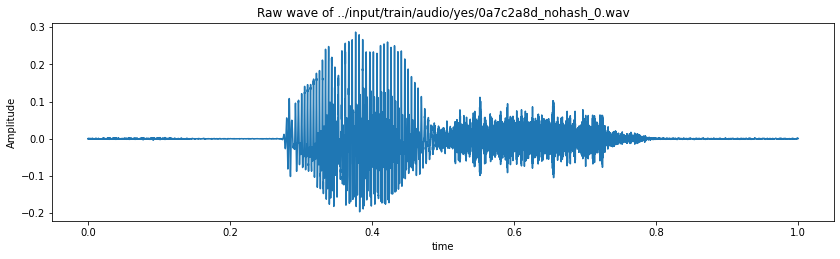

In [10]:
#                                 visualize audio in time series domain

samples, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = 16000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)
plt.show()

In [12]:
ipd.Audio(samples, rate=sample_rate)

In [13]:
print(sample_rate)

16000


In [ ]:
'''
Sampling rate of the signal is 16000 hz.
Let us resample it to 8000 hz
since most of the speech related frequencies are present in 8000z'''

In [14]:
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

In [15]:
labels=os.listdir(train_audio_path)

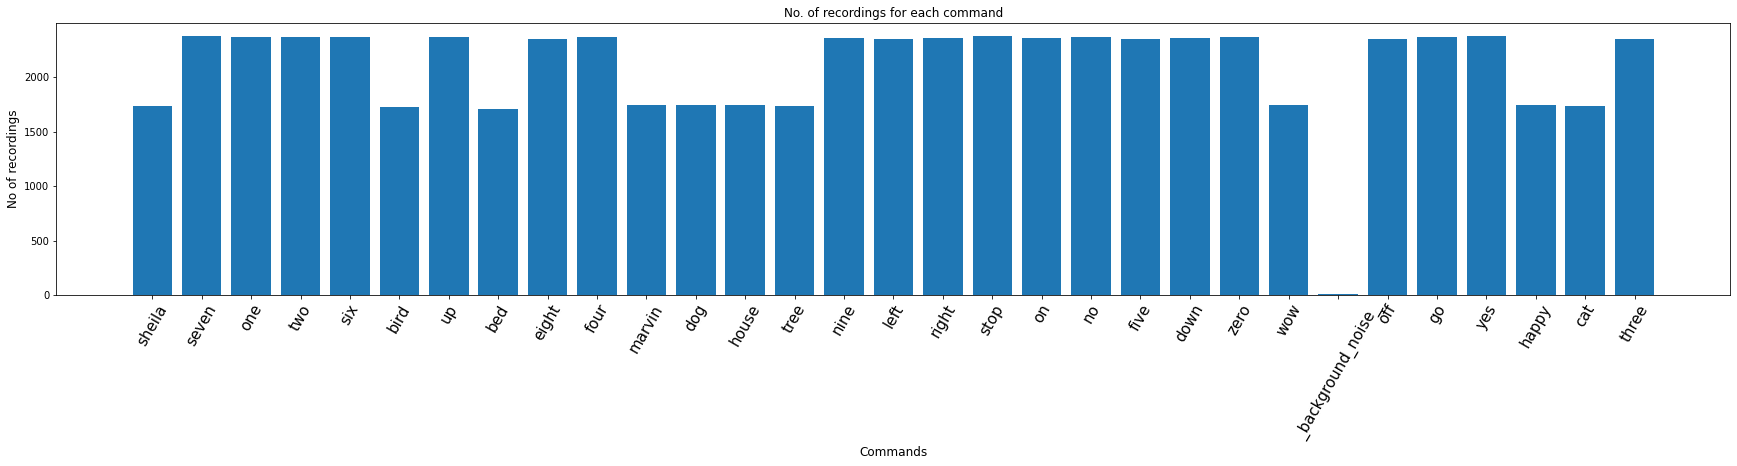

In [16]:
#                             number of recordings for each voice command
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

In [25]:
labels = ["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

(array([1.5000e+01, 3.0000e+01, 4.4000e+01, 1.3800e+02, 1.3600e+02,
        1.7900e+02, 3.6600e+02, 4.3400e+02, 5.9300e+02, 2.1747e+04]),
 array([0.418 , 0.4762, 0.5344, 0.5926, 0.6508, 0.709 , 0.7672, 0.8254,
        0.8836, 0.9418, 1.    ]),
 <BarContainer object of 10 artists>)

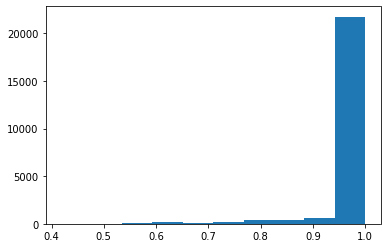

In [26]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

In [ ]:
#Preprossesing audio waves:
# 1: resampling
# 2: removing shorter commands less than 1 sec

In [27]:
all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

yes
no
up
down
left
right
on
off
stop
go


In [28]:
print(type(all_wave))
print(len(all_wave))

<class 'list'>
21312


In [29]:
print(all_wave[1].shape)
all_wave[1]


(8000,)


array([0.00224089, 0.00493751, 0.00578476, ..., 0.00404173, 0.00461246,
       0.00428611], dtype=float32)

In [30]:
#Convert the output labels to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [31]:
# convert the integer encoded labels to a one-hot vector since it is a multi-classification problem
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

In [33]:
# Reshape the 2D array to 3D since the input to the conv1d must be a 3D array
all_wave = np.array(all_wave).reshape(-1,8000,1)
all_wave.shape

(21312, 8000, 1)

In [34]:
#  Next, we will train the model on 80% of the data and validate on the remaining 20%
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=1111,shuffle=True)

In [ ]:
#We will build the speech-to-text model using conv1d.
#Conv1d is a convolutional neural network which performs the convolution along only one dimension.


In [35]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2662, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 2662, 8)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 884, 16)           0     

In [37]:
# loss function to be categorical cross-entropy since it is a multi-classification problem
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
# Early stopping and model checkpoints are the callbacks to stop training the neural network at the right time and to save the best model after every epoch
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [39]:
#   train the model on a batch size of 32 and evaluate the performance
history=model.fit(x_tr, y_tr ,epochs=100, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

Epoch 1/100
533/533 [==============================] - 74s 137ms/step - loss: 2.2325 - accuracy: 0.1433 - val_loss: 1.5971 - val_accuracy: 0.4161
Epoch 2/100
533/533 [==============================] - 73s 136ms/step - loss: 1.5892 - accuracy: 0.3968 - val_loss: 1.2873 - val_accuracy: 0.5637
Epoch 3/100
533/533 [==============================] - 73s 137ms/step - loss: 1.2691 - accuracy: 0.5482 - val_loss: 1.0025 - val_accuracy: 0.6631
Epoch 4/100
533/533 [==============================] - 73s 137ms/step - loss: 1.0563 - accuracy: 0.6310 - val_loss: 0.8900 - val_accuracy: 0.7026
Epoch 5/100
533/533 [==============================] - 73s 137ms/step - loss: 0.9374 - accuracy: 0.6756 - val_loss: 0.7625 - val_accuracy: 0.7567
Epoch 6/100
533/533 [==============================] - 73s 137ms/step - loss: 0.8180 - accuracy: 0.7244 - val_loss: 0.7533 - val_accuracy: 0.7582
Epoch 7/100
533/533 [==============================] - 73s 137ms/step - loss: 0.7636 - accuracy: 0.7361 - val_loss: 0.7000 -

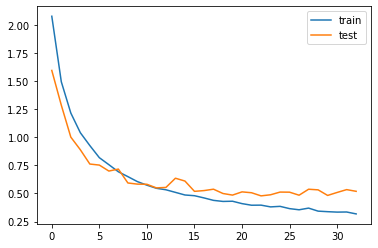

In [40]:
#    Understand the performance of the model over a period of time
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [42]:
from keras.models import load_model


In [43]:
#  predicts text for the given audio
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [44]:
#   predictions on the validation data
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)

Audio: down


In [45]:
print("Text:",predict(samples))

Text: down
